# Student: Aleksander Alan Prymek
# ID: 22263179

## Question:

What is the relation between the number of contacts (`campaign`) and the likelyhood of the client subscribing? Does more contacts increase likelyhood of the client subscribing (`subscribed`)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('./bank.csv')

## B. Quick Data Exploration

#### B.1. Quick Examination of Numerical Attributes

In [3]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

- The `campaign` attribute has median equal to $1$ and upper quartile equal to $2$, meaning that most people were contacted less than $3$ times.
- Roughly $84\%$ of clients were contacted $3.3(=1.9+1.4)$ times.

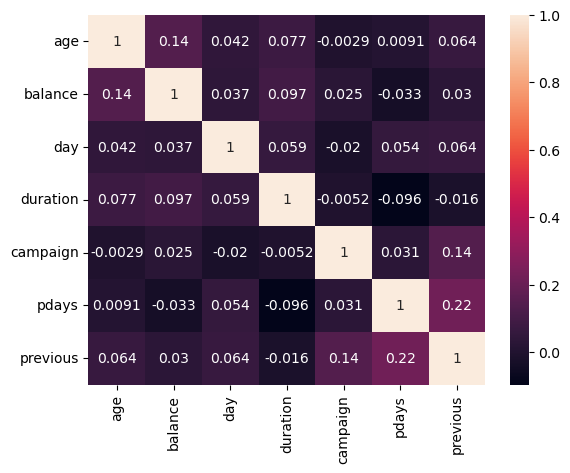

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

- Most attributes have no meaningfull correlation.
- `campaign` is most strongly correlated with `previous` (number of contacts performed before this campaign and for this client).

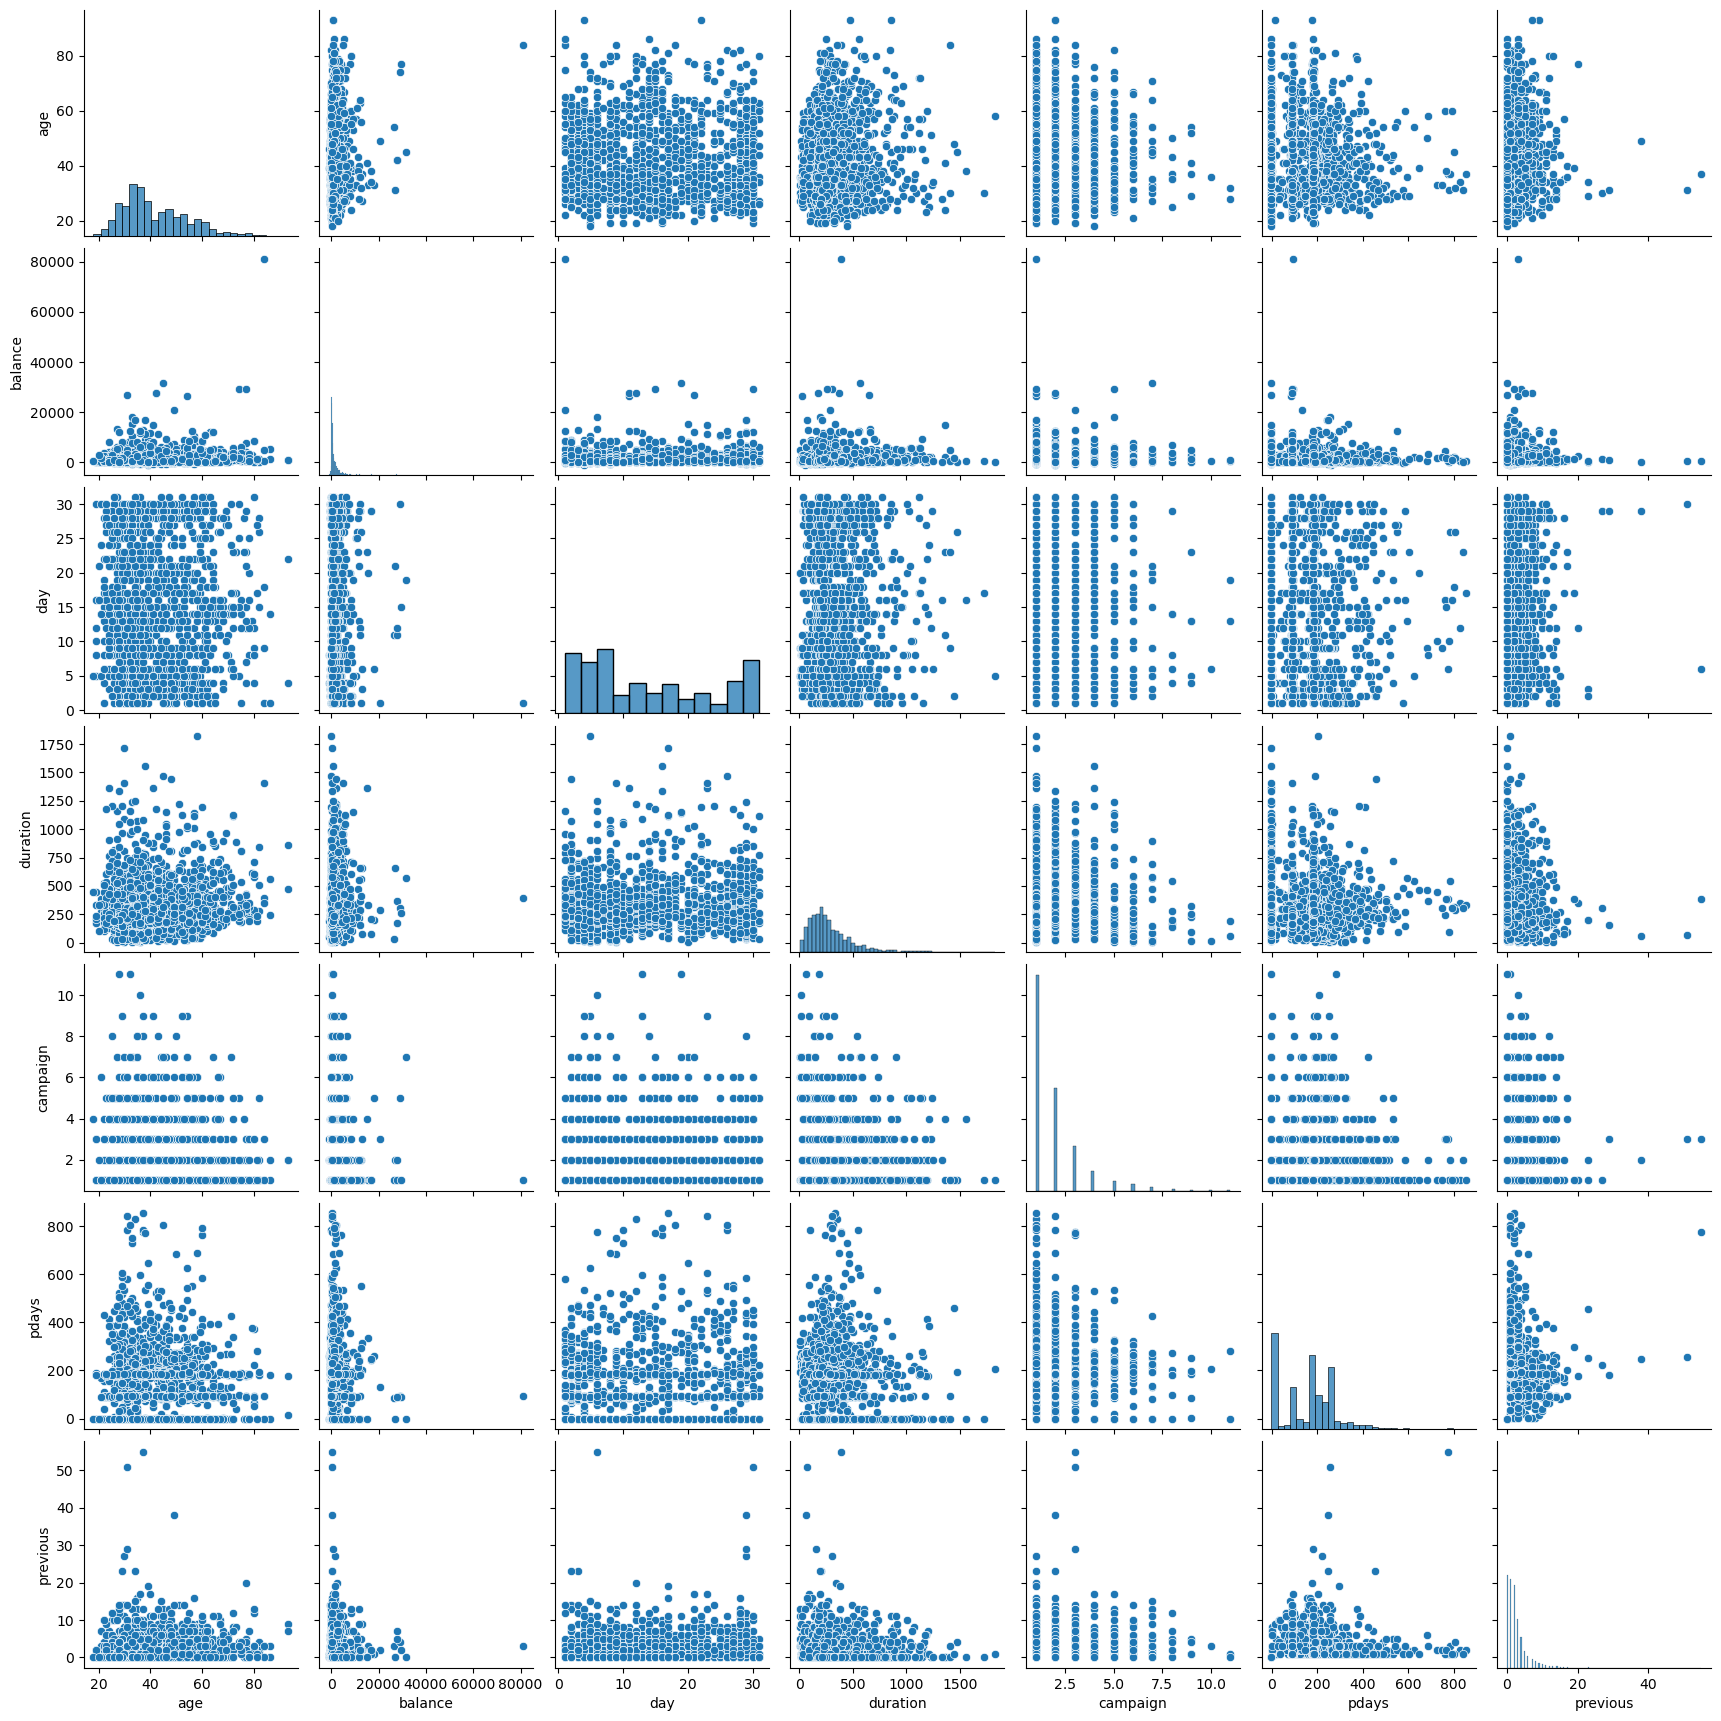

In [6]:
sns.pairplot(data=df[['age','balance','day','duration', 'campaign', 'pdays', 'previous']].dropna())
plt.show()

#### B.2. Quick Examination of Categorical Attributes

In [20]:
print(df['subscribed'].count())
print(df['subscribed'].value_counts())

2000
no     1000
yes    1000
Name: subscribed, dtype: int64


- We have balanced dataset when it comes to number of clients who did and did not subscribed.

## C. Distribution Analysis for Numerical Atributes

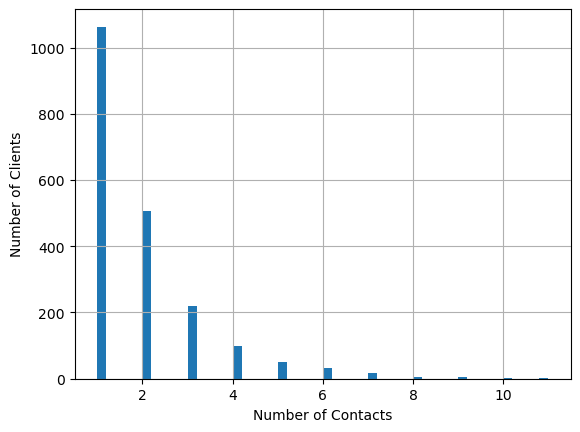

In [22]:
df['campaign'].hist(bins=50)
plt.xlabel('Number of Contacts')
plt.ylabel('Number of Clients')
plt.show()

- As before, most clients were contacted less than $3$ times.
- Number of clients decays exponentially with the number of contacts.

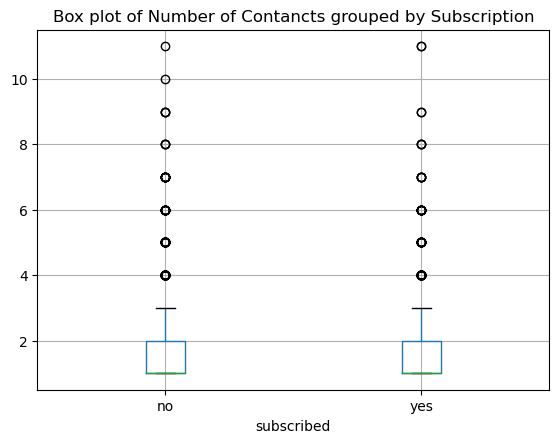

In [25]:
df.boxplot(column='campaign', by='subscribed')
plt.title('Box plot of Number of Contancts grouped by Subscription')
plt.suptitle("")
plt.show()

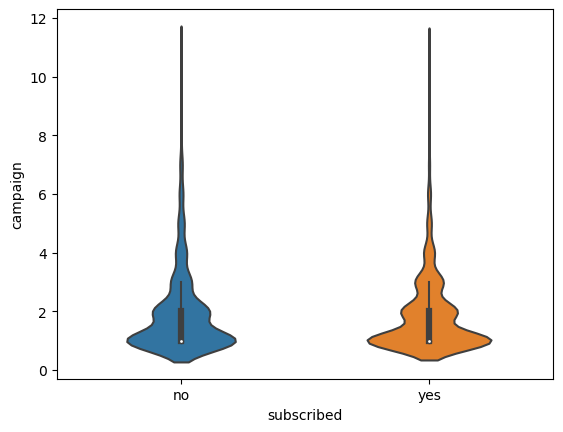

In [31]:
sns.violinplot(data=df, x='subscribed', y='campaign', width=0.5)
plt.show()

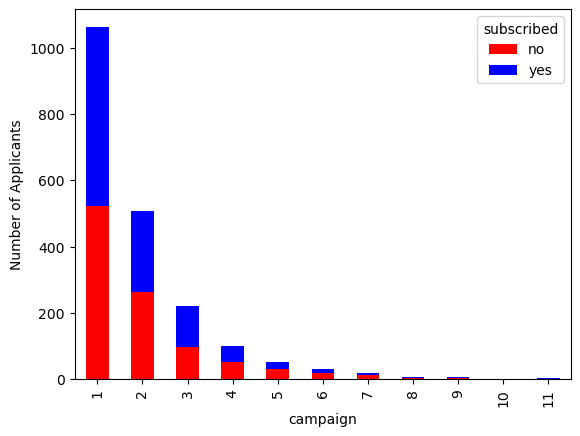

In [33]:
crosstab_CL = pd.crosstab(df['campaign'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

- Distributions for those who did and did not subscribed seem initially identical in the above plots.
- The violin plot shows that the `yes` distribution has slightly higher and narrower peak at the `1` value.

In [69]:
df_sub = pd.DataFrame({
    'n': range(df['campaign'].min(), df['campaign'].max()+1),
    'yes': df.loc[df['subscribed']=='yes']['campaign'].value_counts(),
    'no': df.loc[df['subscribed']=='no']['campaign'].value_counts(),
}).fillna(0)
df_sub['yes'] = df_sub['yes'].astype('int')
df_sub['ratio of yes to no'] = df_sub['yes'] / df_sub['no']
df_sub

n  yes   no  ratio of yes to no
1    1  542  521            1.040307
2    2  243  263            0.923954
3    3  123   96            1.281250
4    4   47   52            0.903846
5    5   20   30            0.666667
6    6   13   18            0.722222
7    7    5   12            0.416667
8    8    3    3            1.000000
9    9    2    3            0.666667
10  10    0    1            0.000000
11  11    2    1            2.000000

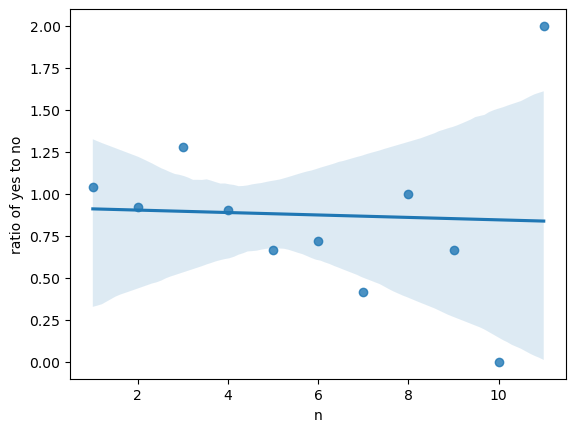

In [88]:
ax = sns.regplot(data=df_sub, x='n', y='ratio of yes to no')
plt.show()

We see that the ratio of clients subscribing falls as the number of contacts increases. Although, in the above, the regression line seems to have only slightly negative slope, we can see more clearly the general trend by removing the outliers --- the points for $10$ and $11$ number of contacts. In the below, the regression line has clearly negative slope suggesting that each successive contact has lower likelyhood of the client subscribing than the previous contact. 

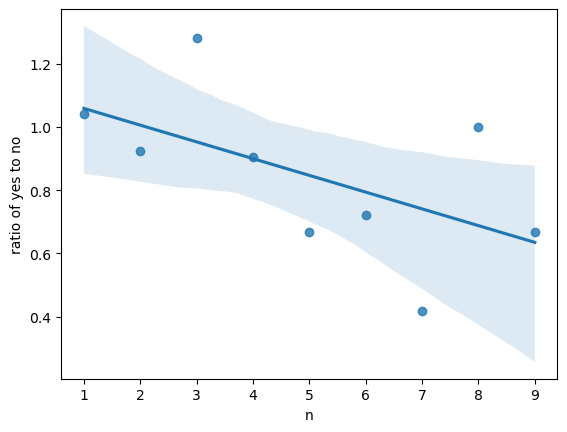

In [93]:
ax = sns.regplot(data=df_sub[:-2], x='n', y='ratio of yes to no')
plt.show()

To answer the initial questions: 
- What is the relation between the number of contacts (`campaign`) and the likelyhood of the client subscribing? 

The relation is meaningfully negative, that is, the larger the number of contacts the more it suggests that the client will continue to be unwilling to subscribe. 